In [37]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load and check data

In [38]:
#RELOAD FILE AND PRETEND THAT IS OUR STARTING POINT 
df=pd.read_csv('../eda/cars-data.csv')  
print(df.shape)
df.head()

(719, 13)


,Unnamed: 0,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,0,18,midsize car,21,4.0,2.2,fwd,gas,26,toyota,Camry,a,1993
1,1,19,midsize car,22,4.0,2.2,fwd,gas,27,toyota,Camry,m,1993
2,2,16,midsize car,19,6.0,3.0,fwd,gas,22,toyota,Camry,a,1993
3,3,16,midsize car,18,6.0,3.0,fwd,gas,22,toyota,Camry,m,1993
4,4,18,midsize-large station wagon,21,4.0,2.2,fwd,gas,26,toyota,Camry,a,1993


In [39]:
nan_count = df.isna().sum()

print(nan_count)

Unnamed: 0           0
city_mpg             0
class                0
combination_mpg      0
cylinders          124
displacement       124
drive                8
fuel_type            0
highway_mpg          0
make                 0
model                0
transmission         0
year                 0
dtype: int64


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       719 non-null    int64  
 1   city_mpg         719 non-null    int64  
 2   class            719 non-null    object 
 3   combination_mpg  719 non-null    int64  
 4   cylinders        595 non-null    float64
 5   displacement     595 non-null    float64
 6   drive            711 non-null    object 
 7   fuel_type        719 non-null    object 
 8   highway_mpg      719 non-null    int64  
 9   make             719 non-null    object 
 10  model            719 non-null    object 
 11  transmission     719 non-null    object 
 12  year             719 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 73.2+ KB


In [41]:
# Convert all 'object' type columns to 'string'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('string')

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       719 non-null    int64  
 1   city_mpg         719 non-null    int64  
 2   class            719 non-null    string 
 3   combination_mpg  719 non-null    int64  
 4   cylinders        595 non-null    float64
 5   displacement     595 non-null    float64
 6   drive            711 non-null    string 
 7   fuel_type        719 non-null    string 
 8   highway_mpg      719 non-null    int64  
 9   make             719 non-null    string 
 10  model            719 non-null    string 
 11  transmission     719 non-null    string 
 12  year             719 non-null    int64  
dtypes: float64(2), int64(5), string(6)
memory usage: 73.2 KB


In [42]:
# get y 

y = df['fuel_type'].unique().tolist()

y

['gas', 'electricity', 'diesel']

In [43]:
# Dropping non-numerical and unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [44]:
# Replace continuous missing values with mean of the column. check for Nan values again.

cols = ['displacement', 'cylinders']
df[cols] = df[cols].fillna(df[cols].mean())

nan_count = df.isna().sum()
print(nan_count)

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              8
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


In [45]:
# Replace categorical missing values with mode of the column. check for Nan values again.

df['drive'] = df['drive'].fillna(df['drive'].mode().iloc[0])

nan_count = df.isna().sum()
print(nan_count)

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


In [46]:
# Using a for loop to replace categorical values with cat codes
cat_cols = ['class', 'drive', 'fuel_type', 'make', 'model', 'transmission']
for col in cat_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

# Display the altered DataFrame
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,18,2,21,4.0,2.2,2,2,26,24,33,0,1993
1,19,2,22,4.0,2.2,2,2,27,24,33,1,1993
2,16,2,19,6.0,3.0,2,2,22,24,33,0,1993
3,16,2,18,6.0,3.0,2,2,22,24,33,1,1993
4,18,4,21,4.0,2.2,2,2,26,24,33,0,1993


In [47]:
df.to_csv('cardf_cleaned.csv')

In [51]:
# Split the dataset in X and y. since this is unsupervised learning, we will not use the y labels. you can choose to normalize the X data by using the StandardScaler function.

x_cols = ['city_mpg', 'class', 'combination_mpg', 'cylinders', 'displacement', 'drive', 'highway_mpg', 'make', 'model', 'transmission', 'year' ]
y_cols = ['fuel_type']

X = df[x_cols]  #'fuel_type' is the column we want to predict.
y = df[y_cols]

X = df[x_cols]  # X data
y = df[y_cols].values.ravel()  # Flatten y to a 1D array

# X.shape, y.shape, y

In [52]:
print(X.shape)
print(y.shape)

(719, 11)
(719,)


In [55]:
print(pd.DataFrame(X.iloc[0:11, :]))

    city_mpg  class  combination_mpg  cylinders  displacement  drive  \
0         18      2               21        4.0           2.2      2   
1         19      2               22        4.0           2.2      2   
2         16      2               19        6.0           3.0      2   
3         16      2               18        6.0           3.0      2   
4         18      4               21        4.0           2.2      2   
5         23      0               24        4.0           1.6      2   
6         23      0               26        4.0           1.6      2   
7         23      0               25        4.0           1.8      2   
8         23      0               26        4.0           1.8      2   
9         23      9               25        4.0           1.8      2   
10        21     10               23        4.0           2.0      2   

    highway_mpg  make  model  transmission  year  
0            26    24     33             0  1993  
1            27    24     33     

In [57]:
print(pd.DataFrame(y[0:10]))

   0
0  2
1  2
2  2
3  2
4  2
5  2
6  2
7  2
8  2
9  2


### Normalization

In [58]:
#NORMALIZE 
X=0.1+(X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))
y=0.1+(y-np.min(y,axis=0))/(np.max(y,axis=0)-np.min(y,axis=0))

### Numerical EDA

In [59]:
# CONVERT TO THE DATA FRAMES FOR PLOTTING
df=pd.DataFrame(np.hstack((X,y.reshape(y.shape[0],1))))

In [60]:
print(df.describe())

               0           1           2           3           4           5   \
count  719.000000  719.000000  719.000000  719.000000  719.000000  719.000000   
mean     0.277670    0.608948    0.292757    0.407803    0.383403    0.705007   
std      0.232149    0.348874    0.240575    0.182344    0.203106    0.270377   
min      0.100000    0.100000    0.100000    0.100000    0.100000    0.100000   
25%      0.149645    0.233333    0.164000    0.242857    0.225000    0.433333   
50%      0.178014    0.700000    0.188000    0.407803    0.383403    0.766667   
75%      0.227660    0.900000    0.252000    0.528571    0.454167    0.766667   
max      1.100000    1.100000    1.100000    1.100000    1.100000    1.100000   

               6           7           8           9           10          11  
count  719.000000  719.000000  719.000000  719.000000  719.000000  719.000000  
mean     0.328195    0.605296    0.590969    0.319750    0.680364    1.010292  
std      0.242278    0.323107 

In [61]:
print("X CORRELATION:") 
corr = df.corr(); print(corr)                   #COMPUTE CORRELATION OF FEATER MATRIX

X CORRELATION:
          0         1         2         3         4         5         6   \
0   1.000000 -0.213484  0.998454 -0.121316 -0.128895 -0.108960  0.991697   
1  -0.213484  1.000000 -0.222664  0.141542  0.169821 -0.029415 -0.236399   
2   0.998454 -0.222664  1.000000 -0.132139 -0.141069 -0.108910  0.997063   
3  -0.121316  0.141542 -0.132139  1.000000  0.921746  0.023977 -0.144294   
4  -0.128895  0.169821 -0.141069  0.921746  1.000000  0.037908 -0.155732   
5  -0.108960 -0.029415 -0.108910  0.023977  0.037908  1.000000 -0.105232   
6   0.991697 -0.236399  0.997063 -0.144294 -0.155732 -0.105232  1.000000   
7   0.168306 -0.146960  0.172437 -0.095927 -0.030382 -0.016696  0.175792   
8   0.115270  0.058427  0.118600 -0.035188 -0.099265 -0.095618  0.119540   
9  -0.240810  0.118692 -0.238849 -0.101199 -0.119059  0.187411 -0.233231   
10  0.561037 -0.075022  0.566843 -0.114270 -0.071015 -0.284616  0.569990   
11 -0.835461  0.144975 -0.841992  0.020498  0.024196  0.171570 -0.846466 

### Correlation matrix heatmap

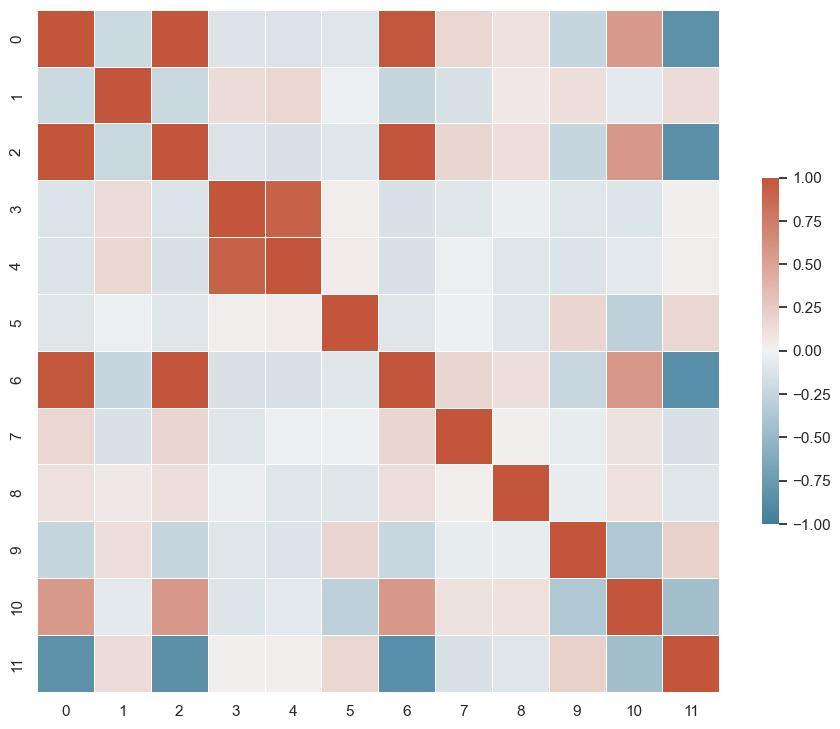

In [62]:
# INSERT CODE TO SHOW A HEAT MAP FOR THE X FEATURES

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True)     # Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

### Multi-variable pair-plot

/Users/isfarbaset/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


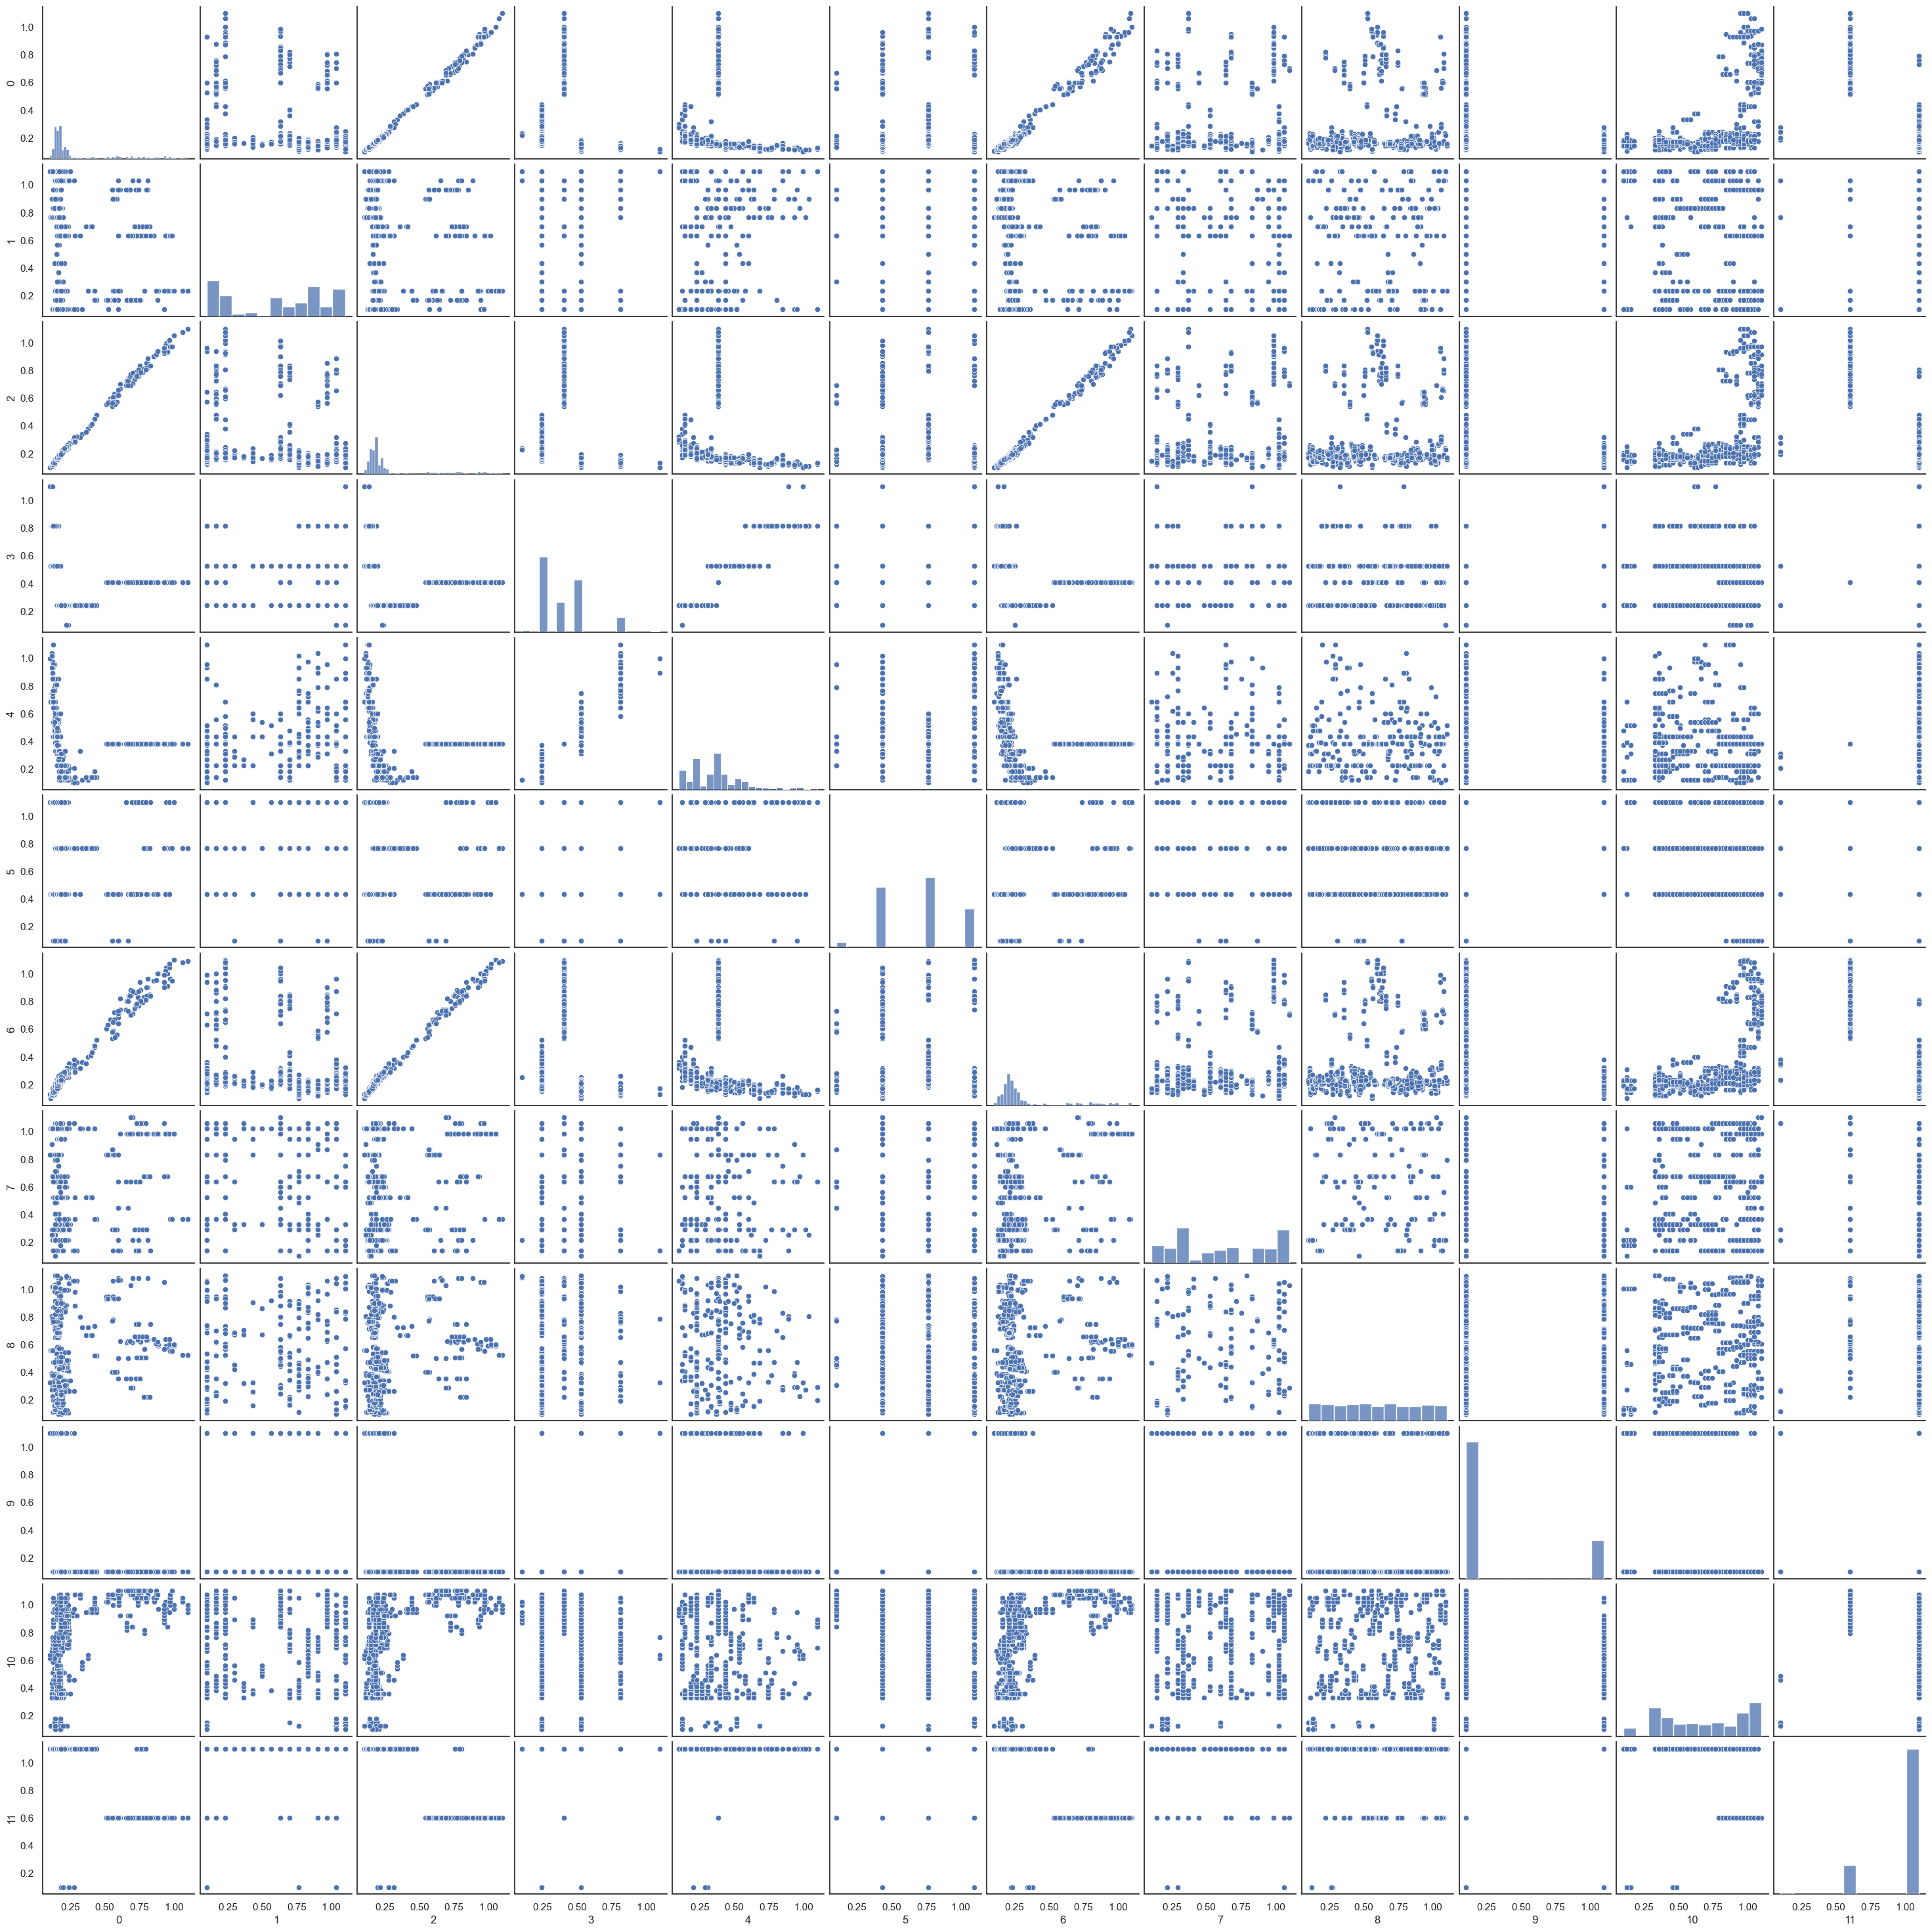

In [63]:
# # # # INSERT CODE TO GENERATE A PAIR-PLOT 
sns.pairplot(df)
plt.show()

## Partition data

In [65]:
#DROP FIRST TWO FEATURES
X = X.iloc[:, 2:]

from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

print("x_train.shape        :",x_train.shape)
print("y_train.shape        :",y_train.shape)

print("X_test.shape     :",x_test.shape)
print("y_test.shape     :",y_test.shape)

x_train.shape        : (575, 9)
y_train.shape        : (575,)
X_test.shape     : (144, 9)
y_test.shape     : (144,)


## Hyper-Parameter tuning (max_depth)
- Goal: Find the optimal hyper parameter

In [66]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


# HYPER PARAMETER SEARCH FOR OPTIMAL NUMBER OF NEIGHBORS 
hyper_param=[]
train_error=[]
test_error=[]

# LOOP OVER HYPER-PARAM
for i in range(1,40):
    # INITIALIZE MODEL 
    model = DecisionTreeRegressor(max_depth=i)

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    # shift=1+np.min(y_train) #add shift to remove division by zero 
    err1=mean_absolute_error(y_train, yp_train) 
    err2=mean_absolute_error(y_test, yp_test) 
    
    # err1=100.0*np.mean(np.absolute((yp_train-y_train)/y_train))
    # err2=100.0*np.mean(np.absolute((yp_test-y_test)/y_test))

    hyper_param.append(i)
    train_error.append(err1)
    test_error.append(err2)

    if(i==1 or i%10==0):
        print("hyperparam =",i)
        print(" train error:",err1)
        print(" test error:" ,err2)

hyperparam = 1
 train error: 0.0186419929742148
 test error: 0.02268100465323882
hyperparam = 10
 train error: 7.117663946155022e-15
 test error: 0.020833333333340878
hyperparam = 20
 train error: 7.117663946155022e-15
 test error: 0.020833333333340878
hyperparam = 30
 train error: 7.117663946155022e-15
 test error: 0.013888888888896438


## Convergence plot

2 0.014922360248454326 0.016865079365086914


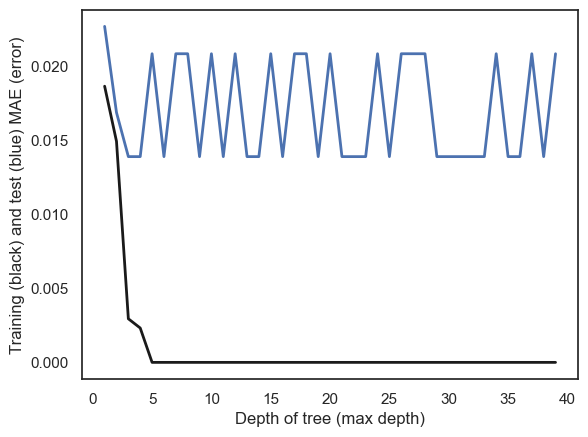

In [67]:
plt.plot(hyper_param,train_error ,linewidth=2, color='k')
plt.plot(hyper_param,test_error ,linewidth=2, color='b')

plt.xlabel("Depth of tree (max depth)")
plt.ylabel("Training (black) and test (blue) MAE (error)")

i=1
print(hyper_param[i],train_error[i],test_error[i])

## Hyper-Parameter tuning (min_samples_splitint)

- Goal: Find the optimal hyper parameter

In [68]:
# HYPER PARAMETER SEARCH FOR OPTIMAL NUMBER OF NEIGHBORS 
hyper_param=[]
train_error=[]
test_error=[]

# LOOP OVER HYPER-PARAM
for i in range(2,100):
    # INITIALIZE MODEL 
    model = DecisionTreeRegressor(min_samples_split=i)

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    # shift=1+np.min(y_train) #add shift to remove division by zero 
    err1=mean_absolute_error(y_train, yp_train) 
    err2=mean_absolute_error(y_test, yp_test) 
    
    # err1=100.0*np.mean(np.absolute((yp_train-y_train)/y_train))
    # err2=100.0*np.mean(np.absolute((yp_test-y_test)/y_test))

    hyper_param.append(i)
    train_error.append(err1)
    test_error.append(err2)

    if(i%10==0):
        print("hyperparam =",i)
        print(" train error:",err1)
        print(" test error:" ,err2)

hyperparam = 10
 train error: 0.002318840579717263
 test error: 0.013888888888896438
hyperparam = 20
 train error: 0.005978260869572333
 test error: 0.013888888888896438
hyperparam = 30
 train error: 0.014922360248454315
 test error: 0.016865079365086907
hyperparam = 40
 train error: 0.014922360248454315
 test error: 0.016865079365086907
hyperparam = 50
 train error: 0.014922360248454315
 test error: 0.016865079365086907
hyperparam = 60
 train error: 0.014922360248454322
 test error: 0.016865079365086914
hyperparam = 70
 train error: 0.014922360248454315
 test error: 0.016865079365086907
hyperparam = 80
 train error: 0.014922360248454322
 test error: 0.016865079365086914
hyperparam = 90
 train error: 0.014922360248454315
 test error: 0.016865079365086907


## **Convergence plot**

Text(0, 0.5, 'Training (black) and test (blue) MAE (error)')

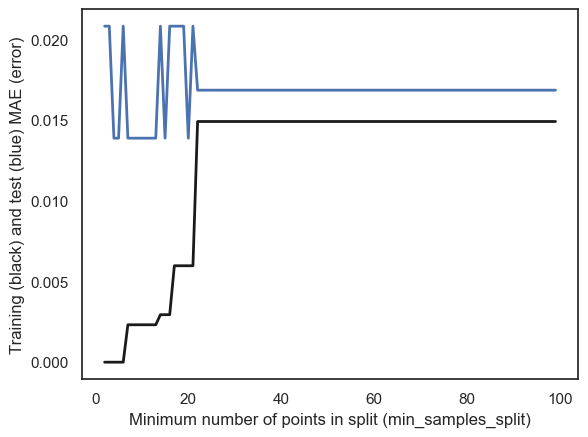

In [69]:
plt.plot(hyper_param,train_error ,linewidth=2, color='k')
plt.plot(hyper_param,test_error ,linewidth=2, color='b')

plt.xlabel("Minimum number of points in split (min_samples_split)")
plt.ylabel("Training (black) and test (blue) MAE (error)")

## Re-train with optimal parameters

In [ ]:
# INITIALIZE MODEL 
model = DecisionTreeRegressor(max_depth=1)
model.fit(x_train,y_train)                     # TRAIN MODEL 


# OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

err1=mean_absolute_error(y_train, yp_train) 
err2=mean_absolute_error(y_test, yp_test) 
    
print(" train error:",err1)
print(" test error:" ,err2)

## Parity Plot
- Plotting y_pred vs y_data lets you see how good the fit is

- The closer to the line y=x the better the fit (ypred=ydata –> prefect fit)

Text(0, 0.5, 'y_pred (blue=test)(black=Train)')

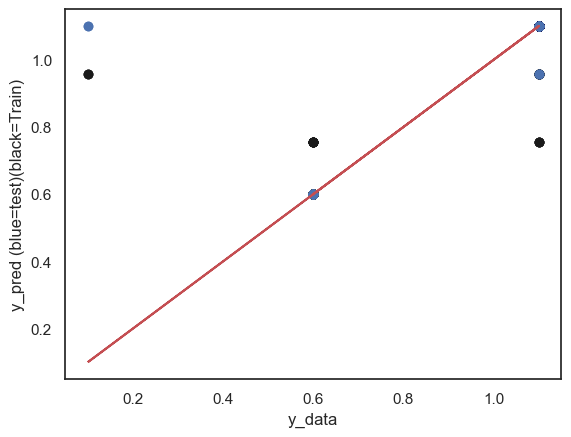

In [71]:
plt.plot(y_train,yp_train ,"o", color='k')
plt.plot(y_test,yp_test ,"o", color='b')
plt.plot(y_train,y_train ,"-", color='r')

plt.xlabel("y_data")
plt.ylabel("y_pred (blue=test)(black=Train)")

In [72]:
from sklearn import tree
def plot_tree(model):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model, 
                    filled=True)
    plt.show()

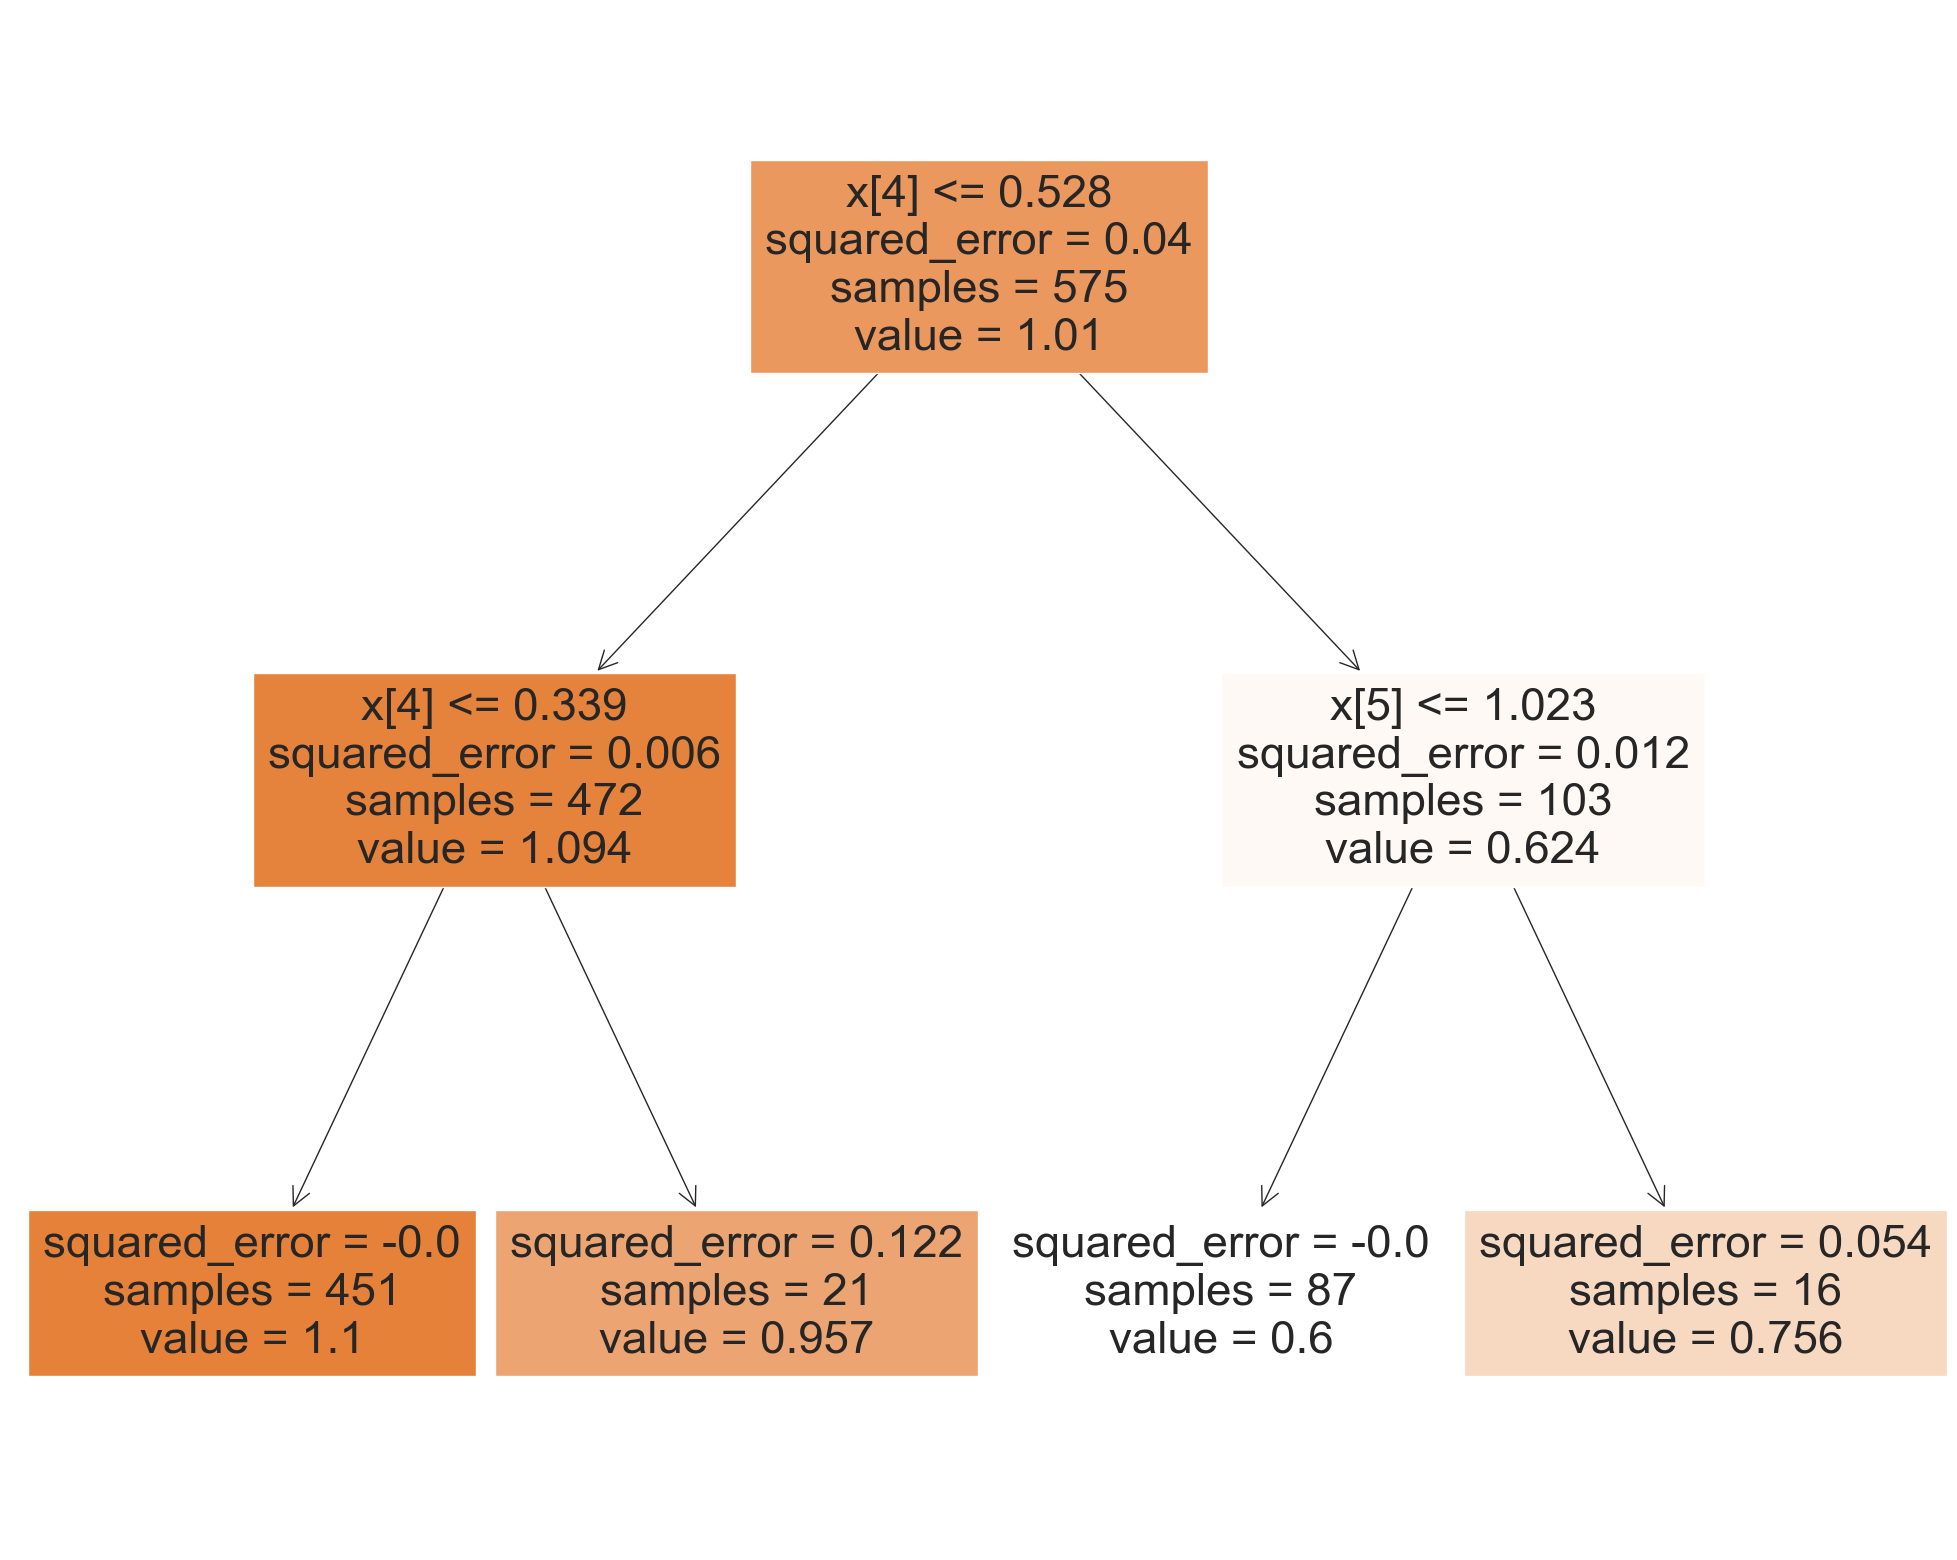

In [73]:
plot_tree(model)

0


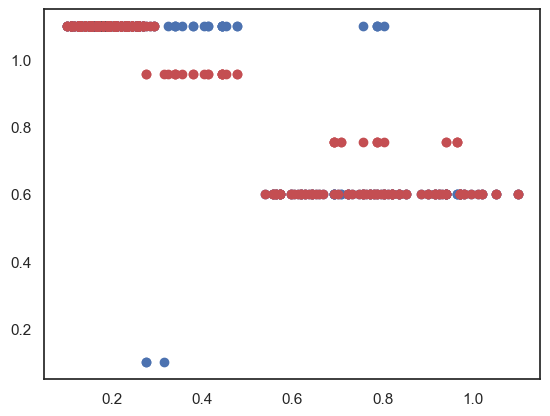

1


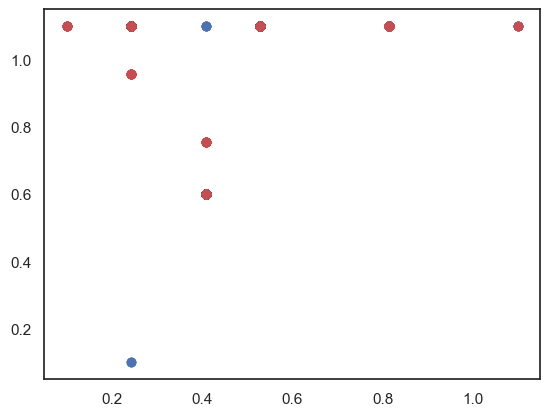

2


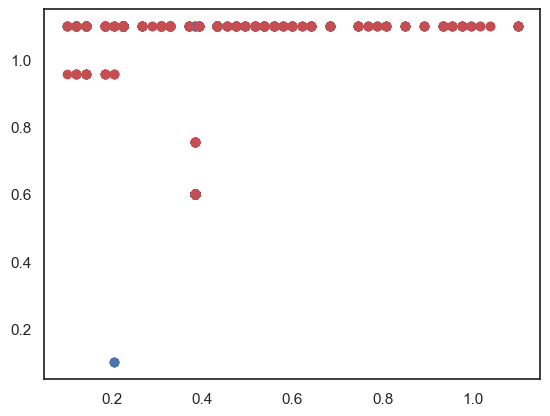

3


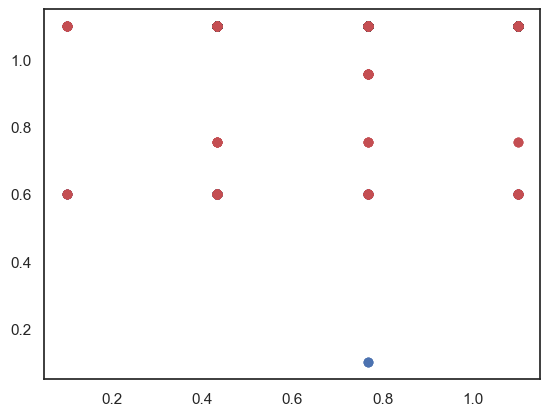

4


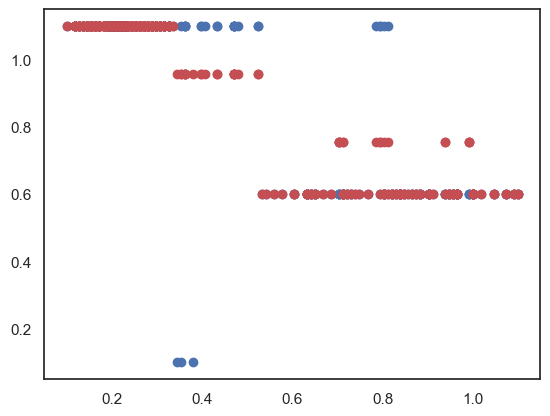

5


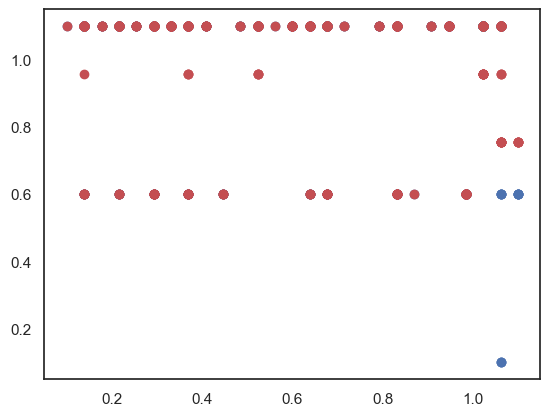

6


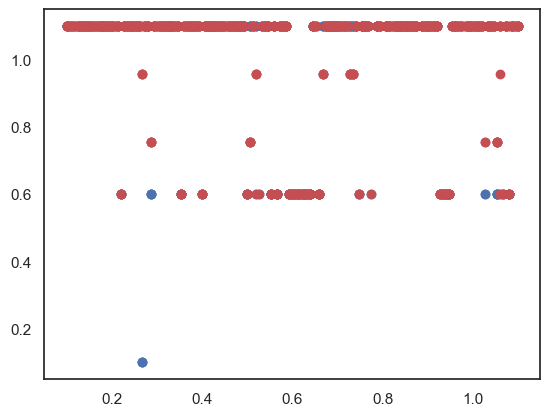

7


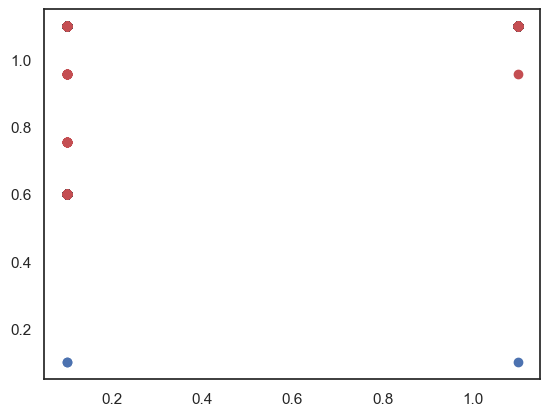

8


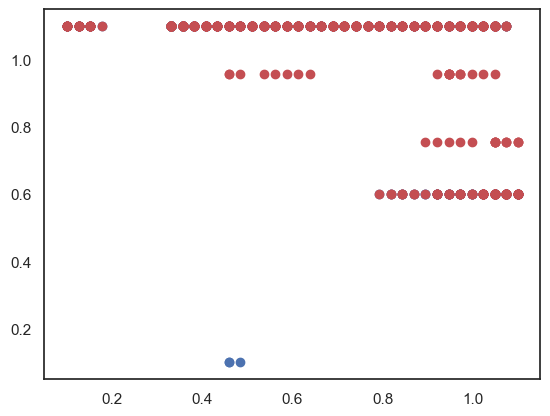

In [75]:
for i in range(0, x_train.shape[1]):
    print(i)
    plt.plot(x_train.iloc[:, i], y_train, "o", color='b')
    plt.plot(x_train.iloc[:, i], yp_train, "o", color='r')
    plt.show()
